<figure>
<IMG SRC="../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 6

### Error bounds on coherence estimates

<div style='background:#F0F0F0'>  The 95% confidence intervals for the coherence squared $\gamma^2_{xy}(f)$ between two variables $x(t)$ and $y(t)$ are approximately:
$$ \gamma^2_{xy} \pm \frac{\sqrt{2}\left(1+\gamma^2_{xy}\right)}{\left|\gamma_{xy} \right|\sqrt{n_d}}$$
where $n_d$ is the number of blocks used to calculate the coherence.  

You **may** use `matplotlib.mlab.csd` for the following question, but you had best use it correctly!
</div>

<div style='background:#F0F0F0'>**1** Make an input process $x(t)$ as random Gaussian noise, and the output process the sum of a noise source and a running average of the input: $y(t)=n(t)+\frac{1}{b}\int_{t-b}^t x(t')dt'$ and plot (Zoom so we can see whats going on, and label your plot).  Make sure you generate a large time series.</div> 

<IPython.core.display.Javascript object>


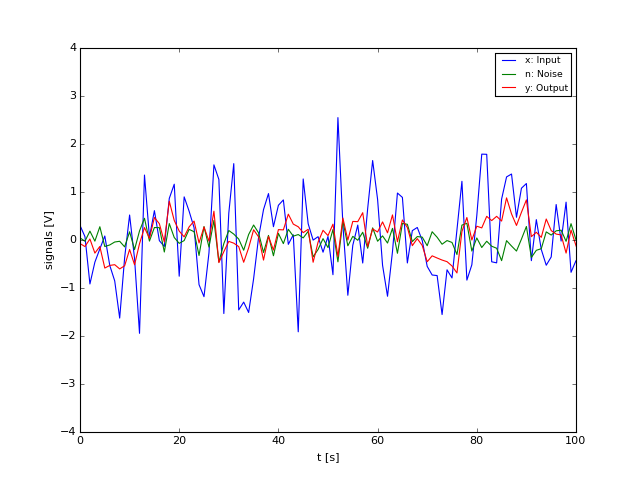

In [2]:
import numpy.random as random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib nbagg

### BEGIN SOLUTION
N=20000
A=1.
B=0.2
b=10
t = np.arange(0,N)
x= A*random.randn(N)
n = B*random.randn(N)
b = np.ones(b)/b
y = n + np.convolve(x,b,mode='same')
fig,ax=plt.subplots(1,1)
ax.plot(t,x,label='x: Input')
ax.plot(t,n,label='n: Noise')
ax.plot(t,y,label='y: Output')
ax.set_xlim([0,100])
ax.set_xlabel('t [s]')
ax.legend(fontsize='small')
ax.set_ylabel('signals [V]')
### END SOLUTION

<div style='background:#F0F0F0'>**2** Compute the coherence squared of the input and the output.  Make a plot with the spectra in the upper panel and the coherence squared in the middle panel and the phase in the bottom.

You will need to choose a value for your fft length.  Choose a relative low one to get a smooth plot.
</div>

{'window': <function window_hanning at 0x105764a28>, 'Fs': 1.0, 'NFFT': 256, 'noverlap': 128}


<IPython.core.display.Javascript object>


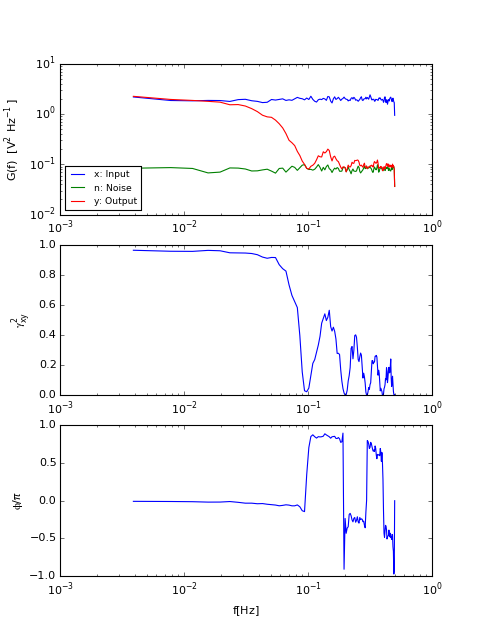

In [6]:
### BEGIN SOLUTION
nfft=256
args={'NFFT':nfft,'Fs':1.,'window':mlab.window_hanning,'noverlap':nfft/2}
print args
px,f=mlab.psd(x,**args)
pn,f=mlab.psd(n,**args)
py,f=mlab.psd(y,**args)
pxy,f=mlab.csd(x,y,**args)
gammasq = np.abs(pxy)**2/px/py
pha = np.angle(pxy)
fig,axs=plt.subplots(3,1,figsize=(6,8))
axs[0].loglog(f,px,label='x: Input')
axs[0].loglog(f,pn,label='n: Noise')
axs[0].loglog(f,py,label='y: Output')
axs[0].legend(fontsize='small',loc=3)
axs[0].set_ylabel('$G(f)\ \ [V^2 Hz^{-1}]$')
axs[1].semilogx(f,gammasq)
axs[1].set_ylabel('$\gamma^2_{xy}$')

axs[2].semilogx(f,pha/np.pi)
axs[2].set_ylabel('$\phi/\pi$')
axs[2].set_xlabel('$f [Hz]$')

### END SOLUTION

COMMENT HERE: 
### BEGIN SOLUTION
### END SOLUTION

<div style='background:#F0F0F0'>**3** Now repeat the above for three different values of NFFT, each 5 times as large as the next.  Plot the resulting coherence squared functions in separate panels.  Add the confidence intervals to your plot and comment on which peaks are significant.
</div>

<IPython.core.display.Javascript object>


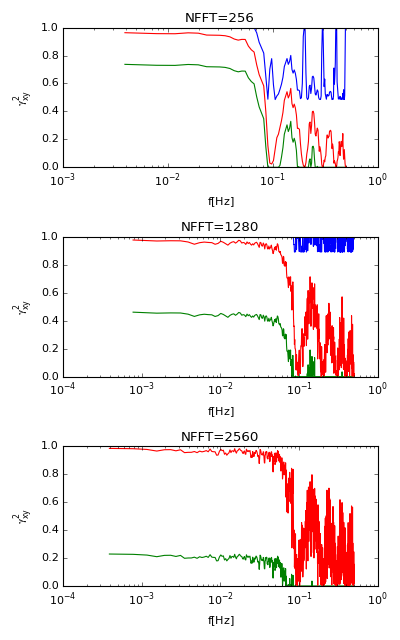

In [9]:
### BEGIN SOLUTION
fig,axs=plt.subplots(3,1,figsize=(5,8))
for ind,nfft in enumerate([256,5*256,10*256]):
    args={'NFFT':nfft,'Fs':1.,'window':mlab.window_hanning,'noverlap':nfft/2}
    px,f=mlab.psd(x,**args)
    pn,f=mlab.psd(n,**args)
    py,f=mlab.psd(y,**args)
    pxy,f=mlab.csd(x,y,**args)
    gammasq = np.abs(pxy)**2/px/py
    nd = len(x)/nfft*2
    ci = np.sqrt(2)*(1+gammasq)/np.sqrt(gammasq)/np.sqrt(nd)
    axs[ind].semilogx(f,np.clip(gammasq+ci,0,1))
    axs[ind].semilogx(f,np.clip(gammasq-ci,0,1))
    axs[ind].semilogx(f,gammasq)
    axs[ind].set_ylabel('$\gamma^2_{xy}$')
    axs[ind].set_title('NFFT=%d'%nfft)
    axs[ind].set_xlabel('$f [Hz]$')
plt.tight_layout()
### END SOLUTION

COMMENT HERE

## Q2: Shear turbulence data

In [10]:
time=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/time.txt')
ac=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/ac.txt')
shear=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/s.txt')


<div style='background:#F0F0F0'>Download the data abaove. `time` is a measurement time in seconds. `shear` is a little less than 300 s of data from a turbulence shear probe. Units are $s^{-1}$. `ac` is a suitably scaled acceleration of the vehicle containing the shear probes.

**1** Plot the shear time series and the accelerometer time series.  Comment on any similarities and differences.  Comment on the stationarity of the time series.

<IPython.core.display.Javascript object>


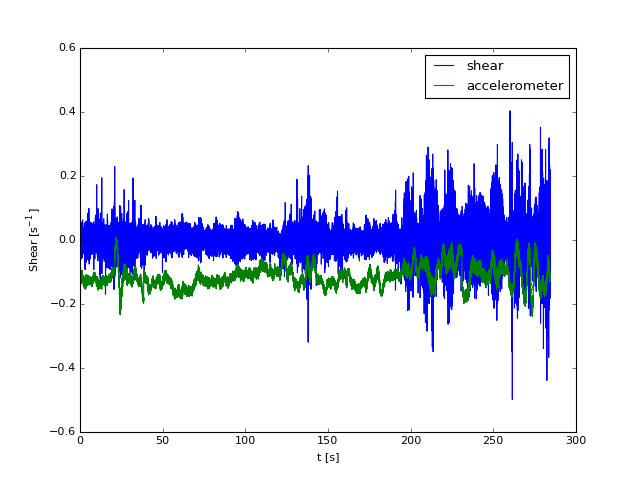

In [12]:
### BEGIN SOLUTION
fig,ax = plt.subplots()
ax.plot(time,shear,label='shear')
ax.plot(time,ac,label='accelerometer')
ax.legend()
ax.set_xlabel('t [s]')
ax.set_ylabel('$Shear\ [s^{-1}]$')
### END SOLUTION

COMMENT HERE

<div style='background:#F0F0F0'> **2** Compute the power spectra of the two signals and the coherence squared (you could do the phase too, but it is not too thrilling).  Comment on the spectral similarities and the coherence.  

In [14]:
### BEGIN SOLUTION
nfft = 512/2
dt = np.median(np.diff(time))
args={'NFFT':nfft,'Fs':1./dt,'window':mlab.window_hanning,'noverlap':nfft/2}
pa,f=mlab.psd(ac,**args)
ps,f=mlab.psd(shear,**args)
pas,f=mlab.csd(ac,shear,**args)
psc = ps-abs(pas)**2/pa
gammasq = abs(pas)**2/pa/ps
### END SOLUTION

In [17]:
### BEGIN SOLUTION
def plotit():
    fig,ax=plt.subplots(2,1,figsize=(7,7));
    ax[0].loglog(f,ps,label='shear')
    ax[0].loglog(f,pa,label='accelerometer')
    ax[0].set_ylabel('$G_{xx}  [(s^{-1})^2\,Hz^{-1}]$')
    ax[0].legend(loc=0,fontsize='small')
    ax[1].semilogx(f,gammasq,label='')
    ax[1].set_ylabel('$\gamma^2$')
    ax[1].set_xlabel('f [Hz]')
    return fig,ax
### END SOLUTION

COMMENT HERE

<div style='background:#F0F0F0'> **3** Compute a spectra that has the contamination from the vibration removed. Comment on how well your correction worked.

<IPython.core.display.Javascript object>


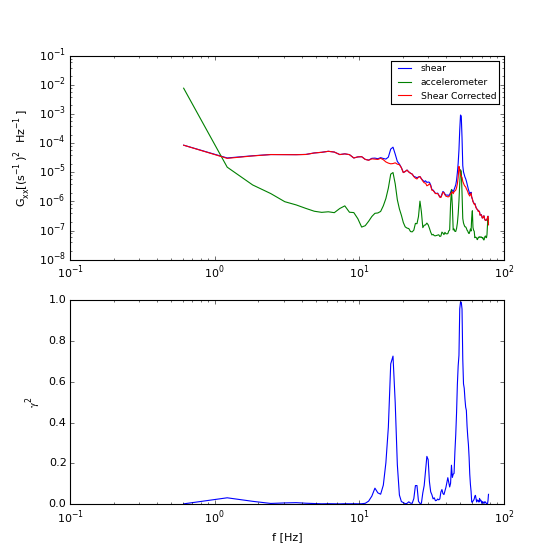

In [20]:
### BEGIN SOLUTION
fig,ax=plotit()
ax[0].loglog(f,psc,label='Shear Corrected')
ax[0].legend(loc=0,fontsize='small')
### END SOLUTION

<div style='background:#F0F0F0'>**4** Chose two separate periods of the time series, one that is "turbulent" and one that is "quiet", and plot the raw and corrected shear spectra.  Comment on the differences and the effect of the correction on each spectral estimate.    

<IPython.core.display.Javascript object>


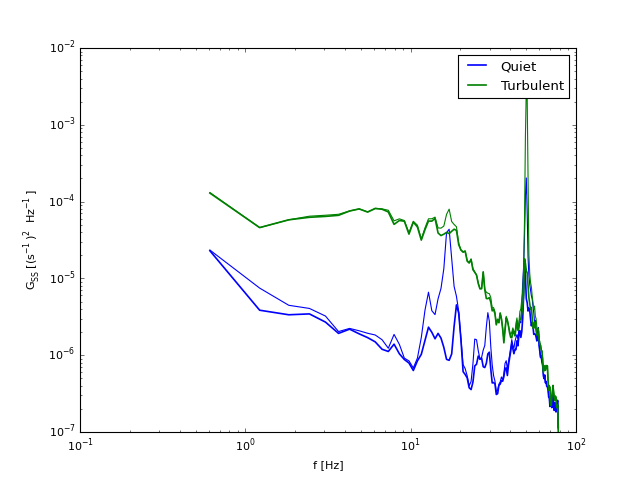

In [23]:
### BEGIN SOLUTION
quiet = np.where((time>50.)&(time<100.))[0]
turb = np.where((time>225.)&(time<275.))[0]
col = ['b','g']
lab = ['Quiet','Turbulent']
fig,ax = plt.subplots()
for n,ind in enumerate([quiet,turb]):
    
    pa,f=mlab.psd(ac[ind],**args)
    ps,f=mlab.psd(shear[ind],**args)
    pas,f=mlab.csd(ac[ind],shear[ind],**args)
    psc = ps-abs(pas)**2/pa
    ax.loglog(f,ps,col[n])
    ax.loglog(f,psc,col[n],linewidth=1.5,label=lab[n])
    ax.set_xlabel('f [Hz]')
    ax.set_ylabel('$G_{SS}\ [(s^{-1})^2\ Hz^{-1}]$')
ax.legend()
### END SOLUTION

COMMENT HERE